## Classification demo including training

In [1]:
##Import libraries
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
## Initialising the CNN
classifier = Sequential()

In [3]:
## Convolution(64 feature detector of dimension 3 by 3), input shape 3 layer for color image)
classifier.add(Convolution2D(64,3,3,input_shape = (128,128,3), activation = 'relu')) #64 kernels of shape 3*3, second 64,64,3 we have taken bcz 3 is RGB color photo

## MaxPooling
classifier.add(MaxPooling2D(pool_size = (2,2))) #make 2*2 matrix and select max element, see slide

## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

## Add another layer
classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))

classifier.add(Convolution2D(64,3,3, activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2,2)))



C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), input_shape=(128, 128,..., activation="relu")`
  
C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  if sys.path[0] == '':
C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
C:\Users\Rhishikesh Padole\AppData\Local\con

In [4]:
## Flattening
classifier.add(Flatten())

In [5]:
## Fully connected ANN, Hidden ANN and output layer
classifier.add(Dense(output_dim = 128, activation = 'relu'))
classifier.add(Dense(output_dim = 1, activation = 'sigmoid')) 

C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  
C:\Users\Rhishikesh Padole\AppData\Local\conda\conda\envs\tensorenviron\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
## Compliling,
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [7]:
## data importing and transforming and scaling

#see different parameters which we can give
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [8]:
## Scaling test data
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
## Importing training data
train_set = train_datagen.flow_from_directory('D:/Lung_Cancer_AI/Train_1/',
                                               target_size=(128, 128),
                                               batch_size= 25,
                                               class_mode='binary')

Found 694 images belonging to 2 classes.


In [10]:
#which is cat which is dog?
label_map = (train_set.class_indices)
print(label_map)

{'Malign': 0, 'Non_Malign': 1}


In [11]:
## Importng test data
test_set = test_datagen.flow_from_directory('D:/Lung_Cancer_AI/Test_1/',
                                            target_size=(128, 128),
                                            batch_size= 4,
                                            class_mode='binary')

Found 219 images belonging to 2 classes.


In [12]:
## fitting model to images
classifier.fit_generator(
        train_set,
        steps_per_epoch= 100,
        epochs= 15,
        validation_data=test_set,
        validation_steps= 219)

Epoch 1/15
100/100 [==============================] - 125s 1s/step - loss: 0.6897 - acc: 0.5553 - val_loss: 0.6890 - val_acc: 0.5670
Epoch 2/15
100/100 [==============================] - 101s 1s/step - loss: 0.6810 - acc: 0.5687 - val_loss: 0.6827 - val_acc: 0.5436
Epoch 3/15
100/100 [==============================] - 92s 923ms/step - loss: 0.6730 - acc: 0.5811 - val_loss: 0.6681 - val_acc: 0.5952
Epoch 4/15
100/100 [==============================] - 92s 924ms/step - loss: 0.6559 - acc: 0.6073 - val_loss: 0.6521 - val_acc: 0.6181
Epoch 5/15
100/100 [==============================] - 90s 899ms/step - loss: 0.6083 - acc: 0.6704 - val_loss: 0.6270 - val_acc: 0.6697
Epoch 6/15
100/100 [==============================] - 90s 897ms/step - loss: 0.5583 - acc: 0.7175 - val_loss: 0.6635 - val_acc: 0.6800
Epoch 7/15
100/100 [==============================] - 86s 864ms/step - loss: 0.5068 - acc: 0.7504 - val_loss: 0.5667 - val_acc: 0.6961
Epoch 8/15
100/100 [==============================] - 90s 9

# Prediction of single new data

In [19]:
## prediction of single new data
import numpy as np
from keras.preprocessing import image
test_image= image.load_img('D:/Lung_Cancer_AI/Validation/Malign/2800002.jpg'
                           ,target_size =(128,128))


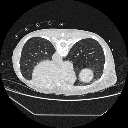

In [20]:
test_image

In [21]:
## Convert image to array
test_image = image.img_to_array(test_image)

In [22]:
## For single prediction change the dimension using axis. To remove problem of batch
test_image = np.expand_dims(test_image,axis = 0)
result = classifier.predict(test_image)

In [23]:
## Class of dog and cat, see 10 for labels

if result[0][0] == 0:
    prediction = 'malign'
else:
    prediction = 'non malign'
    

In [24]:
prediction

'malign'